In [1]:
import pandas as pd
import numpy as np

from create_dataframe import *
from bidding_zones import BIDDING_ZONES_CWE

In [2]:
df_scheduled_exchanges = create_dataframe_scheduled_exchanges(countries_scheduled_exchanges=list(BIDDING_ZONES_CWE.keys()))
df_residual_load = create_dataframe_residual_load(countries_load=list(BIDDING_ZONES_CWE.keys()))
df_day_ahead_prices = create_dataframe_day_ahead_prices(countries_day_ahead_prices=list(BIDDING_ZONES_CWE.keys()))

Finished scheduled exchanges
Finished residual loads
Finished day ahead prices


In [3]:
#df_scheduled_exchanges

In [3]:
df_total = pd.DataFrame()

#df_scheduled_exchanges = df_scheduled_exchanges.sum(axis=1, skipna=True, numeric_only=True)

df_total = pd.concat([df_scheduled_exchanges, df_residual_load, df_day_ahead_prices], axis=1)

In [4]:
df_total.columns

Index(['scheduled_exchanges_AT_DE_LU', 'scheduled_exchanges_BE_FR',
       'scheduled_exchanges_BE_DE_LU', 'scheduled_exchanges_BE_NL',
       'scheduled_exchanges_FR_BE', 'scheduled_exchanges_FR_DE_AT_LU',
       'scheduled_exchanges_FR_DE_LU', 'scheduled_exchanges_DE_AT_LU_FR',
       'scheduled_exchanges_DE_AT_LU_NL', 'scheduled_exchanges_DE_LU_AT',
       'scheduled_exchanges_DE_LU_BE', 'scheduled_exchanges_DE_LU_FR',
       'scheduled_exchanges_DE_LU_NL', 'scheduled_exchanges_NL_BE',
       'scheduled_exchanges_NL_DE_AT_LU', 'scheduled_exchanges_NL_DE_LU',
       'load_AT', 'non_dispatchable_AT', 'residual_load_AT', 'load_BE',
       'non_dispatchable_BE', 'residual_load_BE', 'load_FR',
       'non_dispatchable_FR', 'residual_load_FR', 'load_DE_AT_LU',
       'non_dispatchable_DE_AT_LU', 'residual_load_DE_AT_LU', 'load_DE_LU',
       'non_dispatchable_DE_LU', 'residual_load_DE_LU', 'load_NL',
       'non_dispatchable_NL', 'residual_load_NL', 'day_ahead_prices_AT',
       'day_ahea

In [5]:
df_total.drop(['SDM_FR', 'SDM_AT', 'SDM_BE', 'SDM_NL', 'SDM_DE_LU', 'SDM_DE_AT_LU'], axis=1, inplace=True)

In [6]:
df_total = df_total.fillna(method="ffill")
#df_total=df_total.fillna(0)

In [7]:

df_total = df_total.fillna(method="backfill")

In [8]:
"Machine learning modules"
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")
from tslearn.clustering import TimeSeriesKMeans, KShape
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from catboost import CatBoostRegressor
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor, plot_tree
#import yfinance as yf
from datetime import timedelta, datetime
#import lightgbm as lgbm

In [9]:
df_total = df_total[df_total.index>="20160101"]
df_total = df_total[df_total.index<="20200101"]
#df_total.set_index("Date", drop=True, inplace=True)
df_total

#df1.index = pd.to_datetime(df1.index)

,scheduled_exchanges_AT_DE_LU,scheduled_exchanges_BE_FR,scheduled_exchanges_BE_DE_LU,scheduled_exchanges_BE_NL,scheduled_exchanges_FR_BE,scheduled_exchanges_FR_DE_AT_LU,scheduled_exchanges_FR_DE_LU,scheduled_exchanges_DE_AT_LU_FR,scheduled_exchanges_DE_AT_LU_NL,scheduled_exchanges_DE_LU_AT,scheduled_exchanges_DE_LU_BE,scheduled_exchanges_DE_LU_FR,scheduled_exchanges_DE_LU_NL,scheduled_exchanges_NL_BE,scheduled_exchanges_NL_DE_AT_LU,scheduled_exchanges_NL_DE_LU,load_AT,non_dispatchable_AT,residual_load_AT,load_BE,non_dispatchable_BE,residual_load_BE,load_FR,non_dispatchable_FR,residual_load_FR,load_DE_AT_LU,non_dispatchable_DE_AT_LU,residual_load_DE_AT_LU,load_DE_LU,non_dispatchable_DE_LU,residual_load_DE_LU,load_NL,non_dispatchable_NL,residual_load_NL,day_ahead_prices_AT,day_ahead_prices_BE,day_ahead_prices_FR,day_ahead_prices_DE_AT_LU,day_ahead_prices_DE_LU,day_ahead_prices_NL,mean_price,price_spread_total,price_spread_AT,price_spread_BE,price_spread_FR,price_spread_DE_AT_LU,price_spread_DE_LU,price_spread_NL,relative_price_spread
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01 00:00:00,605.0,725.0,0.0,4.0,8.0,275.0,0.0,2742.0,1870.0,5558.0,100.0,2584.0,726.0,439.0,0.0,3.0,6110.0,1044.0,4563.0,8560.0,845.00,7715.00,56733.0,1753.0,54980.0,48981.0,8696.0,40285.0,42262.0,5674.0,36588.0,10755.0,0.0,10755.0,21.62,22.39,22.39,22.39,59.53,22.39,22.236,0.77,0.616,-0.154,-0.154,-0.1540,-7.105427e-15,-0.154,0.034629
2016-01-01 00:15:00,605.0,725.0,0.0,4.0,8.0,275.0,0.0,2742.0,1870.0,5558.0,100.0,2584.0,726.0,439.0,0.0,3.0,6014.0,1044.0,4563.0,8398.0,803.75,7594.25,56733.0,1753.0,54980.0,48352.0,8700.0,39652.0,42262.0,5674.0,36588.0,10636.0,0.0,10636.0,18.46,22.39,22.39,22.39,59.53,22.39,18.460,0.00,0.000,-0.154,-0.154,-0.1540,-7.105427e-15,-0.154,0.000000
2016-01-01 00:30:00,605.0,725.0,0.0,4.0,8.0,275.0,0.0,2742.0,1870.0,5558.0,100.0,2584.0,726.0,439.0,0.0,3.0,5940.0,1044.0,4563.0,8291.0,762.50,7528.50,56733.0,1753.0,54980.0,47881.0,8763.0,39118.0,42262.0,5674.0,36588.0,10534.0,0.0,10534.0,16.92,22.39,22.39,22.39,59.53,22.39,16.920,0.00,0.000,-0.154,-0.154,-0.1540,-7.105427e-15,-0.154,0.000000
2016-01-01 00:45:00,605.0,725.0,0.0,4.0,8.0,275.0,0.0,2742.0,1870.0,5558.0,100.0,2584.0,726.0,439.0,0.0,3.0,5844.0,1044.0,4563.0,8142.0,721.25,7420.75,56733.0,1753.0,54980.0,47557.0,8766.0,38791.0,42262.0,5674.0,36588.0,10396.0,0.0,10396.0,17.00,22.39,22.39,22.39,59.53,22.39,17.000,0.00,0.000,-0.154,-0.154,-0.1540,-7.105427e-15,-0.154,0.000000
2016-01-01 01:00:00,605.0,762.0,0.0,4.0,14.0,249.0,0.0,2913.0,2028.0,5558.0,100.0,2584.0,726.0,383.0,20.0,3.0,5870.0,1044.0,4563.0,8074.0,680.00,7394.00,55127.0,1430.0,53697.0,46964.0,8690.0,38274.0,42262.0,5674.0,36588.0,10292.0,0.0,10292.0,22.06,20.59,20.59,20.59,59.53,20.59,20.884,1.47,-1.176,0.294,0.294,0.2940,-7.105427e-15,0.294,0.070389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 23:00:00,0.0,0.0,0.0,170.0,325.0,250.0,0.0,5431.0,0.0,500.0,100.0,2088.0,290.0,2108.0,0.0,121.0,6059.0,768.0,5291.0,9233.0,768.00,8465.00,64677.0,3361.0,61316.0,50212.0,7531.0,42681.0,44000.0,6389.0,37611.0,11186.0,0.0,11186.0,41.88,41.88,41.88,60.87,41.88,41.88,41.880,0.00,0.000,0.000,0.000,0.2375,0.000000e+00,0.000,0.000000
2019-12-31 23:15:00,0.0,0.0,0.0,170.0,325.0,250.0,0.0,5431.0,0.0,500.0,100.0,2088.0,290.0,2108.0,0.0,121.0,6001.0,762.0,5239.0,9133.0,762.00,8371.00,64677.0,3361.0,61316.0,50212.0,7531.0,42681.0,43737.0,6382.0,37355.0,11207.0,0.0,11207.0,41.88,41.88,41.88,60.87,41.88,41.88,41.880,0.00,0.000,0.000,0.000,0.2375,0.000000e+00,0.000,0.000000
2019-12-31 23:30:00,0.0,0.0,0.0,170.0,325.0,250.0,0.0,5431.0,0.0,500.0,100.0,2088.0,290.0,2108.0,0.0,121.0,5936.0,756.0,5180.0,9003.0,756.00,8247.00,64677.0,3361.0,61316.0,50212.0,7531.0,42681.0,43422.0,6640.0,36782.0,11237.0,0.0,11237.0,41.88,41.88,41.88,60.87,41.88,41.88,41.880,0.00,0.000

In [11]:
df_total.columns
df_total.drop(['day_ahead_prices_AT',
       'day_ahead_prices_BE', 'day_ahead_prices_FR',
       'day_ahead_prices_DE_AT_LU', 'day_ahead_prices_DE_LU',
       'day_ahead_prices_NL', 'mean_price',
       'price_spread_AT', 'price_spread_BE', 'price_spread_FR',
       'price_spread_DE_AT_LU', 'price_spread_DE_LU', 'price_spread_NL',
       'relative_price_spread'], axis=1, inplace=True)

KeyError: "['day_ahead_prices_AT' 'day_ahead_prices_BE' 'day_ahead_prices_FR'\n 'day_ahead_prices_DE_AT_LU' 'day_ahead_prices_DE_LU'\n 'day_ahead_prices_NL' 'mean_price' 'price_spread_AT' 'price_spread_BE'\n 'price_spread_FR' 'price_spread_DE_AT_LU' 'price_spread_DE_LU'\n 'price_spread_NL' 'relative_price_spread'] not found in axis"

In [11]:
df_total.columns
df_total[relative_price_spread]

Index(['scheduled_exchanges_AT_DE_LU', 'scheduled_exchanges_BE_FR',
       'scheduled_exchanges_BE_DE_LU', 'scheduled_exchanges_BE_NL',
       'scheduled_exchanges_FR_BE', 'scheduled_exchanges_FR_DE_AT_LU',
       'scheduled_exchanges_FR_DE_LU', 'scheduled_exchanges_DE_AT_LU_FR',
       'scheduled_exchanges_DE_AT_LU_NL', 'scheduled_exchanges_DE_LU_AT',
       'scheduled_exchanges_DE_LU_BE', 'scheduled_exchanges_DE_LU_FR',
       'scheduled_exchanges_DE_LU_NL', 'scheduled_exchanges_NL_BE',
       'scheduled_exchanges_NL_DE_AT_LU', 'scheduled_exchanges_NL_DE_LU',
       'load_AT', 'non_dispatchable_AT', 'residual_load_AT', 'load_BE',
       'non_dispatchable_BE', 'residual_load_BE', 'load_FR',
       'non_dispatchable_FR', 'residual_load_FR', 'load_DE_AT_LU',
       'non_dispatchable_DE_AT_LU', 'residual_load_DE_AT_LU', 'load_DE_LU',
       'non_dispatchable_DE_LU', 'residual_load_DE_LU', 'load_NL',
       'non_dispatchable_NL', 'residual_load_NL', 'price_spread_total'],
      dtype='obj

In [12]:
Before_MC_X_train=df_total[df_total.index<="20190901"].drop(["price_spread_total"],axis=1) #bunu ögrettik
Before_MC_y_train=df_total[df_total.index<="20190901"]["price_spread_total"] #bunu tahmin edicek iileride, onu da ögrettik xlerden predict baglantisini cikarsin

Before_MC_X_test=df_total[df_total.index>="20190901"].drop(["price_spread_total"],axis=1)
Before_MC_y_test=df_total[df_total.index>="20190901"]["price_spread_total"]

#After_MC_X_train=After_MC[After_MC.index<="20210901"].drop(["Prices_BG"],axis=1)
#After_MC_y_train=After_MC[After_MC.index<="20210901"]["Prices_BG"]

#After_MC_X_test=After_MC[After_MC.index>="20210901"].drop(["Prices_BG"],axis=1)
#After_MC_y_test=After_MC[After_MC.index>="20210901"]["Prices_BG"]

In [13]:
#Before_MC_X_train
#Before_MC_X_test

In [14]:
modelLR = LinearRegression()

# print(Before_MC_X_train)
# print(Before_MC_y_train)

modelLR.fit(Before_MC_X_train,Before_MC_y_train) #trainleri ögrettik before icin, x ve y. makine bu xlerle bu y yi tahmini ögreniyo

modelLR.score(Before_MC_X_test,Before_MC_y_test)

-0.0528976183989891

In [15]:
modelDTR = DecisionTreeRegressor()
modelDTR.fit(Before_MC_X_train,Before_MC_y_train)
print("Decision Tree Regressor:",modelDTR.score(Before_MC_X_test,Before_MC_y_test))

modelRFR = RandomForestRegressor()
modelRFR.fit(Before_MC_X_train,Before_MC_y_train)
print("Random Forest Regressor:",modelRFR.score(Before_MC_X_test,Before_MC_y_test))

# modelLBGM = lgbm.LGBMRegressor()
# modelLBGM.fit(Before_MC_X_train.drop("Just_Date",axis=1),Before_MC_y_train)
# print("LGBM Regressor:",modelLBGM.score(Before_MC_X_test.drop("Just_Date",axis=1),Before_MC_y_test))


Decision Tree Regressor: -2.690940980398118
Random Forest Regressor: -1.4926756524617857


In [16]:
modelGBR = GradientBoostingRegressor()
modelGBR.fit(Before_MC_X_train,Before_MC_y_train)
print("Gradient Boosting Regressor:",modelGBR.score(Before_MC_X_test,Before_MC_y_test))

Gradient Boosting Regressor: -1.3206174311605814


In [17]:
# modelADA = AdaBoostRegressor()
# modelADA.fit(Before_MC_X_train,Before_MC_y_train)
# print("AdaBoost Regressor:",modelADA.score(Before_MC_X_test,Before_MC_y_test))

<AxesSubplot:xlabel='Date'>

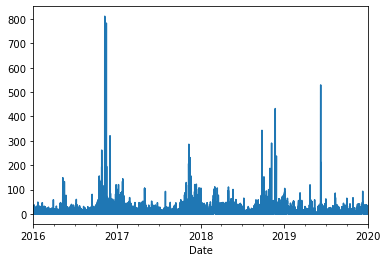

In [18]:
df_total["price_spread_total"].plot()

<AxesSubplot:xlabel='Date'>

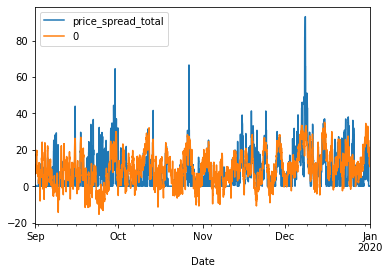

In [19]:
prediction = modelLR.predict(Before_MC_X_test) #bu modele bu xleri verirsek perdictliycegi yleri veriyo
#print(prediction2) #bunlar predikledigi fiyatlar, verdigimiz x ler icin
prediction = pd.Series(prediction, index=Before_MC_y_test.index) #listeydi, series haline cevirdik ki concat #yapabilmek icin
Before_MC_y_test = pd.concat([Before_MC_y_test, prediction], axis=1) #burda testin yanina predicti yapistiriyoruz
Before_MC_y_test.plot() #weil Preise unvorhersehbar steigen, Co2 und Gas Preise hinzufpgen
#print(Before_MC_y_test)